In [1]:
#ch16_01_tensor_NN.ipynb

In [2]:
#以TensorFlow 張量運算實作神經網路數學公式:
#   輸出=activation function(輸入*權重+偏差)
#     y=activation function(x*W+B)

In [2]:
import tensorflow as tf
import numpy as np

In [4]:
#step1: 計算圖
# x(輸入) --> 以二維張量實作, x.shaple: (1,3)  x1,x2,x3
x=tf.Variable([[0.4,0.2,0.4]]) 
# W(權重) --> 以二維張量實作, w.shaple: (3,2) w11,w12 w21,w22 w31,w33
W=tf.Variable([[-0.5,-0.2],[-0.3,0.4],[-0.5,0.2]])
# B(偏移植) --> 以二維張量實作, b.shape: (2,) b1,b2
b=tf.Variable([[0.1,0.2]])

In [5]:
print('x.shape:',x.shape,' W.shape:',W.shape,' b.shape:',b.shape)

x.shape: (1, 3)  W.shape: (3, 2)  b.shape: (1, 2)


In [6]:
#step2:  x*W+B, tf.matmul()
xWb=tf.matmul(x,W)+b
#y=activationFunction(x*W+B), 這裡Activaton Function以 ReLU
y=tf.nn.relu(xWb)

In [7]:
#step3: 以 with Session 執行計算圖
with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    print('xWb:',sess.run(xWb))
    print('y:',sess.run(y))

xWb: [[-0.35999998  0.28      ]]
y: [[ 0.    0.28]]


In [8]:
tf.summary.merge_all() #將所有要顯示在TensorBoard的資料整合
train_writer=tf.summary.FileWriter('log/area',sess.graph) 
#將資料寫至log檔,log檔會儲存在目前程式執行目錄下的log/area子目錄

In [9]:
#==============================================================
#改以 sigmoid 作為 activation function
#y_sigmoid=sigmoid(x*W+B)

In [10]:
#step4.
y_sigmoid=tf.nn.sigmoid(xWb)
with tf.Session() as sess2:
    init=tf.global_variables_initializer()
    sess2.run(init)
    print('xWb:',sess2.run(xWb))
    print('y_sigmoid:',sess2.run(y_sigmoid))

xWb: [[-0.35999998  0.28      ]]
y_sigmoid: [[ 0.41095957  0.56954622]]


In [11]:
#===========================================================================
#上述, Weight與bias 是一定植。
#以下, 為了建立 MLP model
#我們以 TensorFlow.random_normal() 產生的常態分佈亂數, 給定 W和b 初值

In [12]:
#step5: 建立計算圖, W及b為常態分佈亂數
W=tf.Variable(tf.random_normal([3,2])) # 產生 [3,2] 常態分佈亂數 Weight ([[w11,w12],[w21,w22],[w31,w32]])
b=tf.Variable(tf.random_normal([1,2])) # 產生 [1,2] 常態分佈亂數 bias ([[b1,b2]])
#輸入 x 與前式相同, ([[x1,x2,x3]]), [1,3]
x=tf.Variable([[0.4,0.2,0.4]])
#以relu 作為 activation function
y=tf.nn.relu(tf.matmul(x,W)+b)

In [13]:
#step6.　以 with Session 執行計算圖
with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    print('W:',sess.run(W))
    print('b:',sess.run(b))
    print('y:',sess.run(y))

W: [[-0.6503793   0.5868904 ]
 [ 0.58569807 -1.53881252]
 [-0.68978858 -0.53791994]]
b: [[-0.76422042  0.3005389 ]]
y: [[ 0.          0.01236457]]


In [14]:
#step6a. 
#step6 可以合併執行如下:
with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    (W,b,y)=sess.run((W,b,y)) #只要執行一次 sess.run()
    print('W:',W)
    print('b:',b)
    print('y:',y)

W: [[ 0.90648454 -0.27373618]
 [-0.43914443 -0.74810702]
 [-2.61941195 -0.50685871]]
b: [[-0.58265358  0.69388056]]
y: [[ 0.          0.23202121]]


In [15]:
#step6b. tensorflow.random_normal, 常態分佈亂數說明

In [16]:
#使用 tf.random_normal() 產生常態分佈的亂數 list
ts_norm=tf.random_normal([1000])
with tf.Session() as session:
    norm_data=ts_norm.eval() #Evaluates this tensor in a `Session`.
print(norm_data[:5])  #印出前5個值

[ 0.83806759 -1.13771796 -0.57047099  0.72236556  0.51079404]


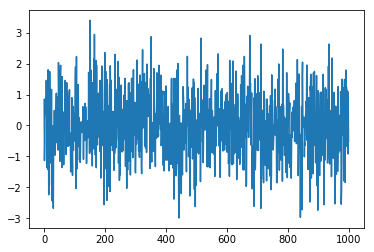

In [17]:
#繪圖顯示 tensor 'ts_norm'
import matplotlib.pyplot as plt
plt.plot(norm_data)
plt.show()

In [18]:
#=========================================================================================
# 以 placeholder 傳入x值
# NN輸入 x (x1,x2,x3),可以是任何數值, 實際運用時我們以 placeholder 傳入NN進行運算
# 以下, 我們將x改為 placeholder, 在 sess.run() 執行計算圖時,可以使用 feed_dict 
# 傳入二維陣列進行運算

In [19]:
W=tf.Variable(tf.random_normal([3,2]))
b=tf.Variable(tf.random_normal([1,2]))
x=tf.placeholder("float",[1,3]) #x, tf.placeholder
y=tf.nn.relu(tf.matmul(x,W)+b)
with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    x_array=np.array([[0.4,0.2,0.4]]) #x_array, [1,3]
    (_b,_W,_x,_y)=sess.run((b,W,x,y),feed_dict={x:x_array}) #在sess.run() 執行計算圖時,以feed_dict參數
                                                          #指定 x (placeholder) 值為 'x_array'
    print('b:',_b)
    print('W:',_W)
    print('x:',_x)
    print('y:',_y)

b: [[-1.49110687  1.20552731]]
W: [[ 0.44330159  0.08456695]
 [-0.87698907 -0.04212309]
 [ 0.88850737  0.61482847]]
x: [[ 0.40000001  0.2         0.40000001]]
y: [[ 0.          1.47686088]]


In [20]:
#練習1: 將上述計算圖,以tensorboard畫出

In [21]:
#============================================================================
#建立layer函數,以矩陣運算模擬NN
#用以建立Multilayer Perceptron, MLP (多層感知器)

In [22]:
#step1. 以TensorFlow自建layer函數 
#output_dim-->輸出神經元個數, input_dim-->輸入神經元個數
#inputs-->輸入的二維陣列placeholder, activation-->activation function 預設是 None
def layer(output_dim,input_dim,inputs,activation=None):
    #產生維度 [input_dim,output_dim] 的常態分佈亂數矩陣,作為Weight的初值
    W=tf.Variable(tf.random_normal([input_dim,output_dim])) 
    #產生維度 [1,output_dim]的常態分佈亂數矩陣,作為bias的初值
    b=tf.Variable(tf.random_normal([1,output_dim]))
    #矩陣運算式 XWb=(inputs*W)+b
    XWb=tf.matmul(inputs,W)+b
    #activation function 設定
    if activation is None:  #如果未指定 activation function
        outputs=XWb         #回傳 XWb
    else:                   #如果有指定 activation function
        outputs=activation(XWb)
    return outputs

In [23]:
#step2. 使用自建的layer函數,建立3層(輸入層(x)、隱藏層(h)、輸出層(y)的MLP
#       其中輸入層(x)維度-->[1,4], 隱藏層(h)維度-->[1,3], 輸出層(y)維度-->[1,2]

In [24]:
#輸入層 X
X=tf.placeholder("float",[1,4])  

In [25]:
#隱藏層 h,使用layer函數來建立
#activation function--> tf.nn.relu
h=layer(output_dim=3,input_dim=4,inputs=X,
       activation=tf.nn.relu)

In [26]:
#輸出層 y,使用layer函數來建立
y=layer(output_dim=2,input_dim=3,inputs=h)

In [27]:
#以with tf.Session() 執行計算圖
with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    #設定X_array 值為 np.array[[4]]
    X_array=np.array([[0.4,0.2,0.4,0.5]])
    #執行sess.run(), feed_dict參數 {X:X_array}
    (layer_X,layer_h,layer_y)=sess.run((X,h,y),feed_dict={X:X_array})
    #print 
    print('input Layer X:',layer_X)
    print('hidden Layer h:',layer_h)
    print('output Layer y:',layer_y)

input Layer X: [[ 0.40000001  0.2         0.40000001  0.5       ]]
hidden Layer h: [[ 0.  0.  0.]]
output Layer y: [[ 1.02879429 -1.36651766]]


In [1]:
#=================================================================================
# 建立layer_debug函數顯示Weight與bias

In [3]:
#step1. 建立layer_debug函數,除了回傳 output 外,也回傳 Weight與bias
def layer_debug(output_dim,input_dim,inputs,activation=None):
    W=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    XWb=tf.matmul(inputs,W)+b
    if activation is None:
        outputs=XWb
    else:
        outputs=activation(XWb)
    return outputs,W,b

In [5]:
#step2. 使用layer_debug函數建立3層MLP (x,h,y),
#並顯示第一層W1與b1,第二層W2,b2
X=tf.placeholder("float",[1,4])
h,W1,b1=layer_debug(output_dim=3,input_dim=4,inputs=X,activation=tf.nn.relu)
y,W2,b2=layer_debug(output_dim=2,input_dim=3,inputs=h)
with tf.Session() as sess:
    init=tf.global_variables_initializer()
    sess.run(init)
    #設定輸入值 X_array
    X_array=np.array([[0.4,0.2,0.4,0.5]])
    (layer_X,layer_h,layer_y,W1,b1,W2,b2)=sess.run((X,h,y,W1,b1,W2,b2),feed_dict={X:X_array})
    print('input Layer X:')
    print(layer_X)
    print('W1:')
    print(  W1)    
    print('b1:')
    print(  b1)    
    print('hidden Layer h:')
    print(layer_h)    
    print('W2:')
    print(  W2)    
    print('b2:')
    print(  b2)    
    print('output Layer y:')
    print(layer_y)
    

input Layer X:
[[ 0.40000001  0.2         0.40000001  0.5       ]]
W1:
[[-0.30718762 -0.6202265   0.24352469]
 [ 0.63291734 -0.41827333 -0.36380172]
 [-0.59345996 -1.88923097 -0.37480724]
 [ 0.50528926 -1.71509302  1.23098528]]
b1:
[[-1.4973501  -0.27952436  1.07052112]]
hidden Layer h:
[[ 0.          0.          1.56074047]]
W2:
[[-0.50013071 -1.33616662]
 [ 1.6664331   1.10669923]
 [ 2.78340697 -1.78515744]]
b2:
[[ 0.20749122  1.44296563]]
output Layer y:
[[ 4.55166721 -1.34320176]]
